In [1]:
from quadrature import *

In [ ]:
def execution_time(to_evaluate):
    """
    Decorator to test the speed of the quadrature
    formulas
    """
    def wrapper(self,*args, **kwargs):
        start = time.time();
        result = to_evaluate(self,*args, **kwargs);
        end = time.time();
        print(f"{to_evaluate.__name__} executed in {end - start} seconds.");
        return result;
    return wrapper

def plotConvergenceHistory(eval):
    """
    Decorator for plotting the errors 
    of convergence
    """
    
    def wrapPlot(self,*args,**kwargs):
        ax_ = args[5];
        errors = eval(self,*args,**kwargs);
        if(kwargs['plotError'] == True):
            ax_.semilogy(args[3],errors,linewidth=3,label=self.__str__());
            ax_.set_xlabel("Number of points");
            ax_.set_ylabel("Absolute error");
            ax_.set_xticks(args[3]);
            ax_.set_title("Absolute error for different numerical quadrature formulas");
            ax_.legend(loc='best');
        return errors;

    return wrapPlot;
        
class pyQuadrature:
    """
    A general class for numerical quadrature formulas
    """
    quad_available_types = ["Simpson","Trapezoidal","MidPoint","GaussLegeandre"];
    
    def __init__(self,QuadType : str):
        """
        Base constructor
        Initialize from the quadrature type as string.
        
        :param (str) QuadType: Type of numerical quadrature formula used
        """
        self.ChooseIntegratorType(QuadType);
    
    def __call__(self,to_integrate : callable , x_start : float, x_end : float , N : int):
        """
        Call simply the operator for integrating a function
        
        :param (fun) to_integrate: Function to integrate
        :param (float) x_start: Minimum extrema for integration
        :param (float) x_end: Maximum extrema for integration
        :param (int) N: Number of points used for integration
        """
        return self.integrator(to_integrate,x_start,x_end,N);

    @execution_time
    def integrate(self,to_integrate : callable , x_start : float, x_end : float , N : int):
        return self.__call__(to_integrate,x_start,x_end,N);

    @plotConvergenceHistory
    def evaluate(self,to_integrate : callable , x_start : float, x_end : float , N : list, analytic_res : float, 
                 ax : plt.matplotlib.axes.Axes.plot, plotError = True):
        """
        Evaluating the goodness of a single quadrature formula
        
        :param (fun) to_integrate: Function to integrate
        :param (float) x_start: minimum extrema for integration
        :param (float) x_end: maximum extrema for integration
        :param list(int) N: List of number of points to test
        :param float analytic_res: Analytical results
        :param (bool) plotError: Flag that enable the plotting
        """
        error = [];
        for n in N:
            error.append(abs(self.integrate(to_integrate,x_start,x_end,n)-analytic_res));
            
        return error;
            
    def ChooseIntegratorType(self,QuadType : str):
        """
        Method for choosing the quadrature formula
        
        :param (str) QuadType: Quadrature-type formula
        """
        
        if(QuadType not in pyQuadrature.quad_available_types ):
            raise KeyError("Invalid numerical quadrature-type")
        else:
            match QuadType:
                case "Simpson":
                    self.integrator = qb.pyNumSimp();
                    self.type = "Simpson";
                case "Trapezoidal":
                    self.integrator = qb.pyNumTrapz();
                    self.type = "Trapezoidal";
                case "MidPoint":
                    self.integrator = qb.pyNumMid();
                    self.type = "MidPoint";
                case "GaussLegeandre":
                    self.integrator = qb.pyNumGaussLeg();
                    self.type = "Gauss-Legeandre";
                    
    def __str__(self):
        """
        Return which type of quadrature formula i have
        """
        return self.type;


class EvalQuadFormulas:
    """
    Class for evaluating the goodness of different
    numerical formulas
    """
    def __init__(self,to_integrate : callable, QuadTypes : list,x_start : float,
                 x_end : float, N : list, analytic_result : float):
        """
        Constructor

        :param (fun) to_integrate: The function we want to integrate
        :param list(str) QuadTypes: Quadrature formulas
        :param (float) x_start: minimum extrema of integration
        :param (float) x_end: maximum extrema of integration
        :param list(int) N: Number of points to test
        :param float : Analytic results
        """
        #Check if the quadrature-type is present:
        for quadType in QuadTypes:
            if(quadType not in pyQuadrature.quad_available_types):
                raise KeyError(f'Invalid numerical quadrature type "{quadType}" \
                                found while evaluating various quadrature formulas.');

        self.formulas = [];
        for quad in QuadTypes:
            self.formulas.append(pyQuadrature(quad));
            self.to_integrate = to_integrate;
            self.x_start = x_start;
            self.x_end = x_end;
            self.N = N;
            self.analytic_result = analytic_result;

            
    def plotResults(self):
        """
        Plot the results for the various quadrature formulas.
        """
        fig,axs = plt.subplots(1,1,figsize=(7,7));
        for indx,formula in enumerate(self.formulas):
            formula.evaluate(self.to_integrate,self.x_start,self.x_end,self.N,self.analytic_result,axs,plotError=True);
        plt.show();
 

In [2]:
# Test the basic usage of the specialized class:
to_integrate = lambda x: x*x*x*x;
x_start = 0.0;
x_end = 2.0;
analytical_res = 6.4;

N = 3;

#Simpson
integrator = pyQuadrature("Simpson");
res0 = integrator(to_integrate,x_start,x_end,N);

#Change the type of quadrature formula:
integrator.ChooseIntegratorType("Trapezoidal");
res1 = integrator(to_integrate,x_start,x_end,N);

integrator.ChooseIntegratorType("GaussLegeandre");
res2 = integrator(to_integrate,x_start,x_end,N);

print(f"Simpson results : {res0}");
print(f"Trapezoidal results : {res1}");
print(f"Gauss-Legeandre results : {res2}");
print(f"Analytical result : {analytical_res}");

Simpson results : 6.403292181069956
Trapezoidal results : 7.572016460905349
Gauss-Legeandre results : 6.4
Analytical result : 6.4


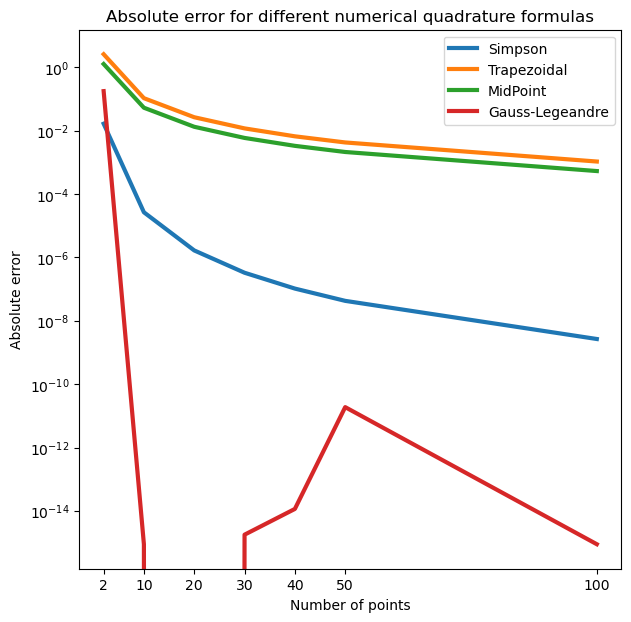

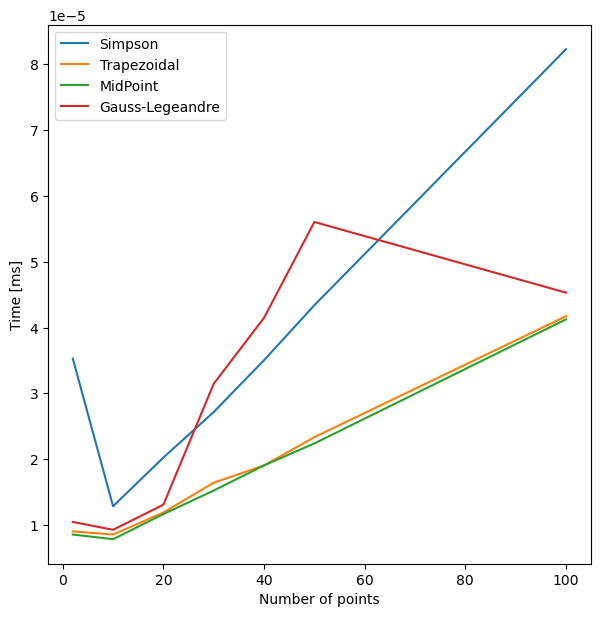

In [3]:
# Plot the order of convergence for various quadrature formulas:
N_points = [2,10,20,30,40,50,100];
history = EvalQuadFormulas(to_integrate,["Simpson","Trapezoidal","MidPoint","GaussLegeandre"],
                           x_start,x_end,N_points,analytical_res);

history.plotResults();
history.plotTimes();